# Encodings and Other Techniques in Mutivariate Exploration of Data

Three main non-positional encodings:
- Shape
- Size
- Color

---

### Table of Contents

[Encodings]()
- [Example 1: Encodings with Shape]() 
- [Example 2: Encodings with Size]() 
- [Example 3: Encodings with Colors]()

In [1]:
import os
os.chdir("projects_on_GitHub/data_viz/Visualization_with_mpl_and_sns")

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')

In [3]:
fuel_econ.VClass.value_counts().index

Index(['Midsize Cars', 'Compact Cars', 'Subcompact Cars', 'Large Cars',
       'Minicompact Cars'],
      dtype='object')

### Example 1: Encoding with SHAPE

#### Preparatory Step 1: Convert the car type in `VClass` as ordinal categorical data type.

In [4]:
# Extract the unique type in `VClass` values
sedan_classes = ['Minicompact Cars', 'Midsize Cars', 'Compact Cars', 'Subcompact Cars', 'Large Cars']

# Customize a categorical data type using `pd.api.types.CategoricalDtype()` function
vclass = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Convert the `VClass` column using newly defined data type
fuel_econ.VClass = fuel_econ.VClass.astype(vclass)

# Verification
fuel_econ.VClass.unique()

['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars', 'Minicompact Cars']
Categories (5, object): ['Minicompact Cars' < 'Midsize Cars' < 'Compact Cars' < 'Subcompact Cars' < 'Large Cars']

#### Preparatory Step 2: Extract the transmission type from `trans` column.

In [5]:
fuel_econ.loc[:, 'trans_type'] = fuel_econ.trans.apply(lambda x: x.split(' ')[0])

# Verification
fuel_econ.trans_type.value_counts()

Automatic    3068
Manual        861
Name: trans_type, dtype: int64

In [6]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


#### Step 3: Draw the scatter plot using `sns.regplot()` function.

In [7]:
np.random.seed(2018)
sample_mask = np.random.choice(fuel_econ.shape[0], 200, replace=False)
fuel_econ_subset = fuel_econ.loc[sample_mask, :]

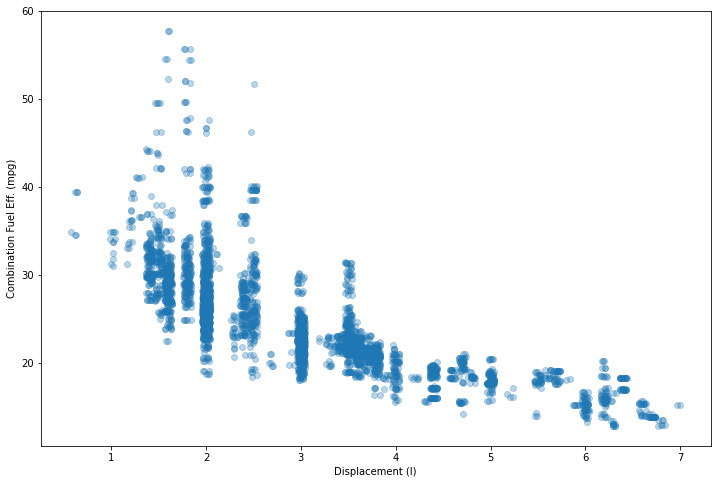

In [8]:
plt.figure(figsize=(12, 8))
sns.regplot(data=fuel_econ, x='displ', y='comb', fit_reg=False, x_jitter=0.04, scatter_kws={'alpha': 0.3})
plt.xlabel('Displacement (l)')
plt.ylabel('Combination Fuel Eff. (mpg)');

#### Step 4: Shape Encodings 

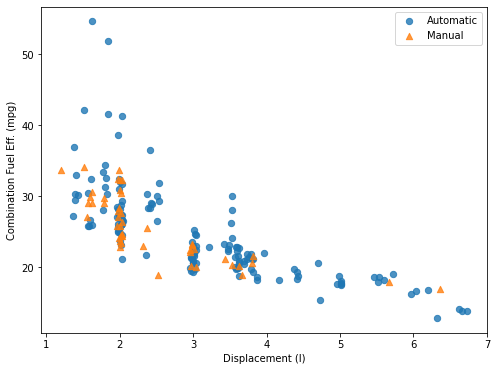

In [22]:
plt.figure(figsize=(8, 6))
t_type_markers = [['Automatic', 'o'], 
                 ['Manual', '^']]

for t_type, t_marker in t_type_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type']==t_type, :]
    sns.regplot(data=plot_data, x='displ', y='comb', \
                fit_reg=False, \
                x_jitter=0.04, \
                marker=t_marker, \
                scatter_kws={'s': 40})
plt.legend(['Automatic', 'Manual'])    
plt.xlabel('Displacement (l)')
plt.ylabel('Combination Fuel Eff. (mpg)');

### Example 2: Encoding with SIZE

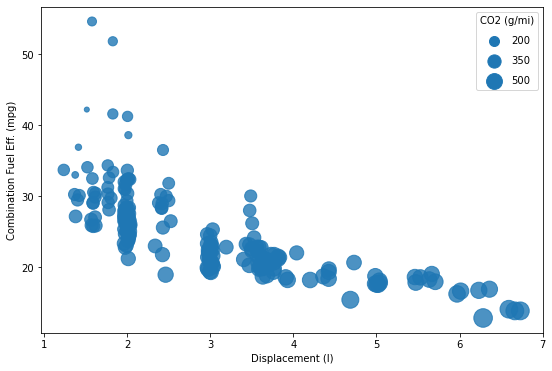

In [63]:
plt.figure(figsize=(9, 6))

# Add `co2` as the third variable
sns.regplot(data=fuel_econ_subset, \
            x='displ', \
            y='comb', \
            fit_reg=False, \
            x_jitter=0.04, \
            scatter_kws={'s': fuel_econ_subset['co2']/2})

# Concstruct the legend
sizes = [200, 350, 500]
legend_obj = []
base_color = sns.color_palette()[0]
for s in sizes:
    legend_obj.append(plt.scatter([], [], s=s/2, color=base_color))

plt.xlabel('Displacement (l)')
plt.ylabel('Combination Fuel Eff. (mpg)')
plt.legend(legend_obj, sizes, labelspacing=1, title='CO2 (g/mi)');

### Example 3: Encoding with Colors

___Context 1:___

To start, let's look at the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

In [65]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [102]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special-attack   807 non-null    int64  
 13  special-defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB


In [86]:
pokemon[['speed', 'defense', 'special-defense']].describe()

,speed,defense,special-defense
count,807.000000,807.000000,807.000000
mean,65.830235,71.726146,70.013631
std,27.736838,29.730228,27.292344
min,5.000000,5.000000,20.000000
25%,45.000000,50.000000,50.000000
50%,65.000000,67.000000,65.000000
75%,85.000000,89.000000,85.000000
max,160.000000,230.000000,230.000000


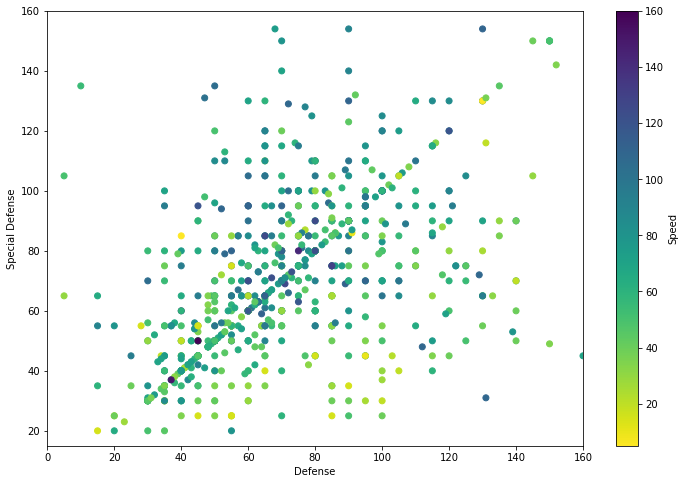

In [88]:
plt.figure(figsize=(12, 8))
plt.scatter(data=pokemon, x='defense', y='special-defense', c='speed', cmap='viridis_r')
plt.colorbar(label='Speed')
plt.xlim(0,160)
plt.ylim(15,160)
plt.xlabel('Defense')
plt.ylabel('Special Defense');

___Conlusion:___ When creating the plot, I made the figure size bigger and set axis limits to zoom into the majority of data points. I might want to apply some manual jitter to the data since I suspect there to be a lot of overlapping points. From the plot as given, I see a slight increase in speed as both defense and special defense increase. However, the brightest points seem to be clumped up in the center in the 60-80 defense and special defense ranges with the two brightest points on the lower left of the diagonal.

---

___Context 2:___

How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon? You may want to subset your dataframe before proceeding with the plotting code. 

**Hint**: If you remember from the univariate plots lesson, one of your axis variables may need to be transformed. If you plan on using FacetGrid, its `.set()` method will be vital for adjusting the axis scaling and tick marks. Check the [last example in the Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) for an example of how the `.set()` method is used, and the [matplotlib documentation of the Axes class](https://matplotlib.org/api/axes_api.html) for properties that you might want to set.

In [92]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


To complete the second task, we need to first reshape the dataset so that all Pokémon types are recorded in a single column. This will add duplicates of Pokémon with two types, which is fine for the task to be performed.

#### Preparatory Step 1: Reconstruct the dataset.

In [101]:
# Select all the columns excluding `type_1` and `type_2`
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)

# Melt the `type_1` and `type_2` columns as one column
pkmn_types = pokemon.melt(id_vars=non_type_cols, \
                          value_vars=type_cols, \
                          var_name='type_level', \
                          value_name='type').dropna()

pkmn_types.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


In [104]:
# Select only the data where `type` equal to `fairy` and `dragon`
pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]
pokemon_sub.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
34,45,113,48,1,0.6,70,35,60,65,clefairy,35,7.5,type_1,fairy
35,70,217,73,1,1.3,95,36,95,90,clefable,60,40.0,type_1,fairy
146,64,60,45,1,1.8,41,147,50,50,dratini,50,3.3,type_1,dragon
147,84,147,65,1,4.0,61,148,70,70,dragonair,70,16.5,type_1,dragon
148,134,270,95,1,2.2,91,149,100,100,dragonite,80,210.0,type_1,dragon


<Figure size 864x576 with 0 Axes>

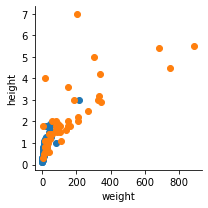

In [109]:
plt.figure(figsize=(12, 8))
f = sns.FacetGrid(data=pokemon_sub, hue='type')
f.map(plt.scatter, 'weight', 'height');

In [113]:
pokemon_sub.weight.describe()

count     92.000000
mean      86.643478
std      154.770876
min        0.100000
25%        6.600000
50%       22.350000
75%       87.500000
max      888.000000
Name: weight, dtype: float64

#### Preparatory Step 2: Rescale the `weight` values using `np.log10()`.

> ___Here we applied three different ways to achieve the same result.___

>1. `plt.scatter()` and self-define scaling function.
>2. `plt.scatter()` and `plt.xscale('log')` function.
>3. `sns.FacetGrid(hue=)` and `plt.scatter()` functions.

In [ ]:
def log_trans(x, inverse=False):
    if not inverse:
        return np.log10(x)
    
    else:
        return 10 ** x

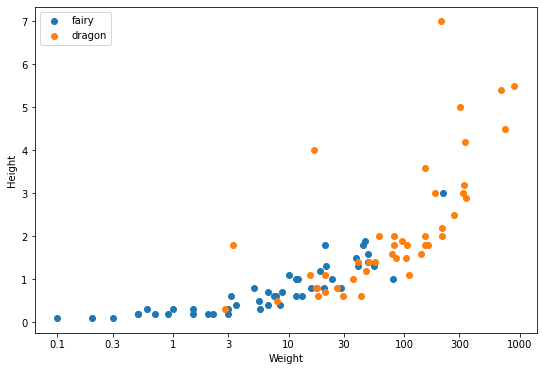

In [155]:
# Method 1a - Use self-defined function to transform the axis.
plt.figure(figsize=(9, 6))

types = ['fairy', 'dragon']

for type_ in types:
    dt = pokemon_sub[pokemon_sub['type']==type_]
    plt.scatter(x=dt['weight'].apply(log_trans), y=dt['height'], label=True)

new_ticks = [.1, .3, 1, 3, 10, 30, 100, 300, 1000]
plt.xticks(log_trans(new_ticks), new_ticks)

plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend(types, loc=2);


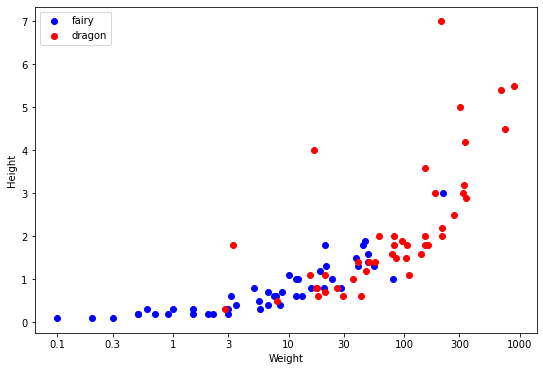

In [156]:
# Method 1b - customize the colors for each group.

plt.figure(figsize=(9, 6))

ctypes = [['fairy', 'blue'], ['dragon', 'red']]

for type_, color in ctypes:
    dt = pokemon_sub[pokemon_sub['type']==type_]
    plt.scatter(x=dt['weight'].apply(log_trans), y=dt['height'], color=color)

plt.xticks(log_trans(new_ticks), new_ticks)

plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend(['fairy', 'dragon'], loc=2);

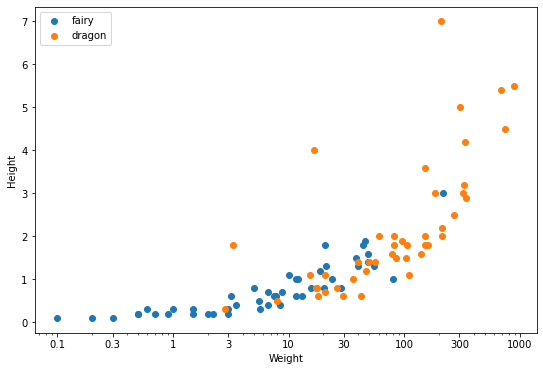

In [196]:
# Method 2 - Use built-in `plt.xscale()` to transform the x axis.

plt.figure(figsize=(9, 6))

types = pokemon_sub.type.unique()

for type_ in types:
    dt = pokemon_sub[pokemon_sub['type']==type_]
    plt.scatter(x=dt['weight'], y=dt['height'])

plt.xscale('log')
ticks = [.1, .3, 1, 3, 10, 30, 100, 300, 1000]
plt.xticks(ticks, ticks);

plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend(['fairy', 'dragon'], loc=2);



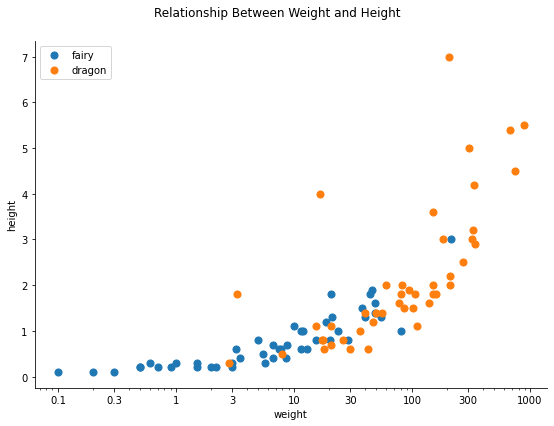

In [194]:
# Method 3 - Use FacetGrid method.
g = sns.FacetGrid(data = pokemon_sub, hue = 'type', height = 6, aspect=1.3)
g.map(plt.scatter, 'weight','height', s=50)
g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks = x_ticks, xticklabels = x_ticks)

g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Relationship Between Weight and Height')
plt.legend(loc=2);

___Conclusion:___ The plot shows the drastic difference in sizes and weights for the Fairy and Dragon Pokemon types.